# 一、資料匯入

### 解壓縮檔案

In [1]:
import zipfile
import os

zip_name = "Bike-Sharing-Dataset.zip"
file_dir = "Bike-Sharing-Dataset"

if not os.path.exists(os.getcwd()+'\\'+file_dir):
    with zipfile.ZipFile(zip_name, 'r') as myzip:
        for file in myzip.namelist():
                myzip.extract(file, file_dir)

### 查看資料

#### day資料

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

day_path = os.getcwd()+'\\Bike-Sharing-Dataset\\day.csv'

%matplotlib inline
plt.style.use('ggplot')
#plt.rcParams['font.family']='DFKai-SB'             #顯示中文
plt.rcParams['axes.unicode_minus']=False         #正常顯示負號

pd.set_option("display.max_columns",50)               #設定pandas最多顯示出50個欄位資訊
pd.set_option("display.html.table_schema",True)
df_day = pd.read_csv(day_path, encoding='big5')
df_day.sample(5) #隨機取其中5筆資料

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
508,509,2012-05-23,2,1,5,0,3,1,2,0.621667,0.584612,0.774583,0.102000,766,4494,5260
98,99,2011-04-09,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083,879,1576,2455
353,354,2011-12-20,4,0,12,0,2,1,2,0.385833,0.396454,0.595417,0.061571,216,3534,3750
656,657,2012-10-18,4,1,10,0,4,1,2,0.522500,0.512625,0.728333,0.236937,1008,6501,7509
161,162,2011-06-11,2,0,6,0,6,0,1,0.725000,0.678038,0.654583,0.154850,1729,3237,4966


In [3]:
#check Null values
df_day.isnull().values.any()

False

# 二、檢查特徵相關性及線性關係
把相關性大於0.6的塗上黃色

In [4]:
# 把DataFrame加上highlight背景色
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1))     #Series condition setting(boolean)
    return ['background-color: yellow' if v else '' for v in is_high]

### 相關性分析
查看彼此的相關程度

In [5]:
# day相關性分析
df_day.corr().round(3).style.apply(highlight_highcorr)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1,0.412,0.866,0.497,0.016,-0,-0.004,-0.021,0.151,0.153,0.016,-0.113,0.275,0.66,0.629
season,0.412,1,-0.002,0.831,-0.011,-0.003,0.012,0.019,0.334,0.343,0.205,-0.229,0.21,0.412,0.406
yr,0.866,-0.002,1,-0.002,0.008,-0.005,-0.002,-0.049,0.048,0.046,-0.111,-0.012,0.249,0.594,0.567
mnth,0.497,0.831,-0.002,1,0.019,0.01,-0.006,0.044,0.22,0.227,0.222,-0.208,0.123,0.293,0.28
holiday,0.016,-0.011,0.008,0.019,1,-0.102,-0.253,-0.035,-0.029,-0.033,-0.016,0.006,0.054,-0.109,-0.068
weekday,-0,-0.003,-0.005,0.01,-0.102,1,0.036,0.031,-0,-0.008,-0.052,0.014,0.06,0.057,0.067
workingday,-0.004,0.012,-0.002,-0.006,-0.253,0.036,1,0.061,0.053,0.052,0.024,-0.019,-0.518,0.304,0.061
weathersit,-0.021,0.019,-0.049,0.044,-0.035,0.031,0.061,1,-0.121,-0.122,0.591,0.04,-0.247,-0.26,-0.297
temp,0.151,0.334,0.048,0.22,-0.029,-0,0.053,-0.121,1,0.992,0.127,-0.158,0.543,0.54,0.627
atemp,0.153,0.343,0.046,0.227,-0.033,-0.008,0.052,-0.122,0.992,1,0.14,-0.184,0.544,0.544,0.631


### 散步圖矩陣
檢查特徵存在的線性關係，因為假設有兩個特徵呈現高度正相關，則我們只需要其中一種特徵

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA8C5C0C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DA8F987D68>]], dtype=object)

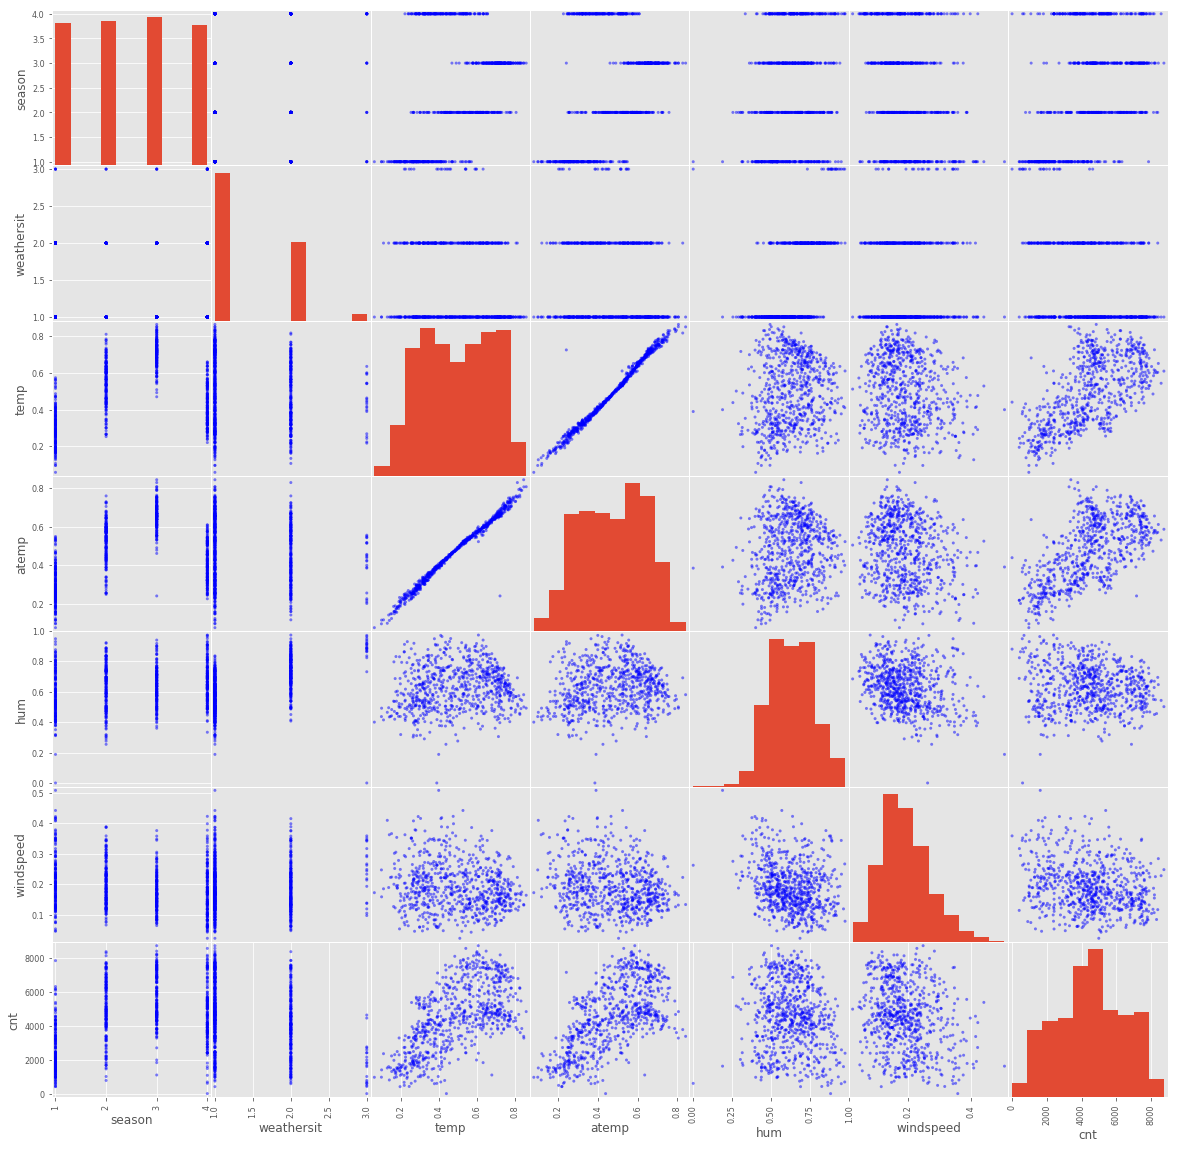

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_day[['season','weathersit','temp','atemp','hum','windspeed','cnt']],figsize=(20, 20),color='b')

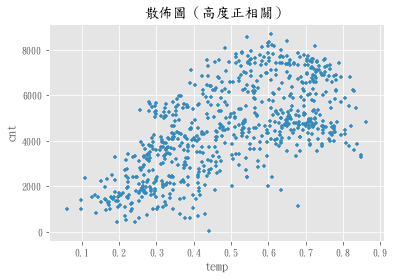

In [7]:
plt.rcParams['axes.unicode_minus']=False #正常顯示負號
plt.rcParams['font.family']='DFKai-SB'             #顯示中文
df_day.plot(kind='scatter',title='散佈圖（高度正相關）',figsize=(6,4),x='temp',y='cnt',marker='+')

# 三、線性回歸

## 3.1簡單線性回歸(1 feature)

### 3.1.1季節(season)和租賃自行車數量(cnt)

各變項參數: 
 [[ 720.71590541]]
均方誤差 (Mean squared error, MSE): 3422965.86


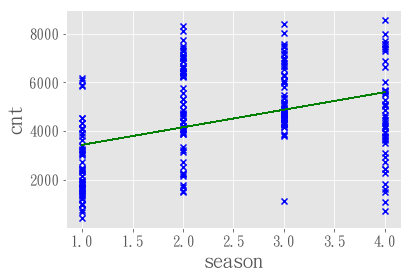

In [8]:
from sklearn.model_selection import train_test_split
from matplotlib.font_manager import FontProperties
font_title = FontProperties(size=20, weight='extra bold')

X = df_day[['season']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training


# 畫出回歸線
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.tick_params(labelsize=15)

plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('season',FontProperties=font_title)
plt.show()

### 3.1.2天氣(weathersit)和租賃自行車數量(cnt)

各變項參數: 
 [[-994.83199465]]
均方誤差 (Mean squared error, MSE): 3753647.48


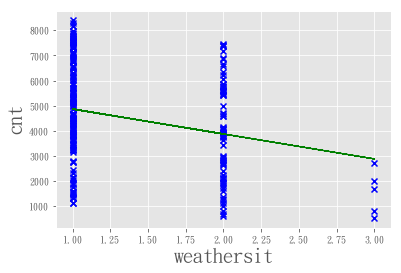

In [9]:
X = df_day[['weathersit']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('weathersit',FontProperties=font_title)
plt.show()

### 3.1.3溫度(temp)和租賃自行車數量(cnt)

各變項參數: 
 [[ 7241.77846882]]
均方誤差 (Mean squared error, MSE): 2563973.98


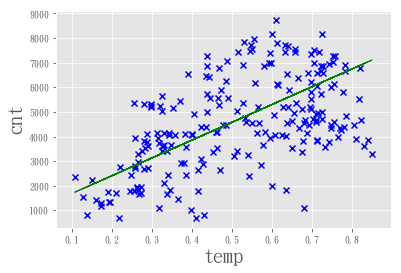

In [10]:
X = df_day[['temp']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('temp',FontProperties=font_title)
plt.show()

### 3.1.4體感溫度(atemp)和租賃自行車數量(cnt)

各變項參數: 
 [[ 7578.514666]]
均方誤差 (Mean squared error, MSE): 1961467.82


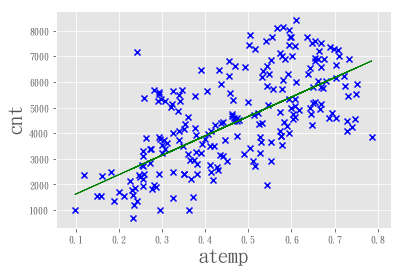

In [11]:
X = df_day[['atemp']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('atemp',FontProperties=font_title)
plt.show()

### 3.1.5濕度(hum)和租賃自行車數量(cnt)

各變項參數: 
 [[-1230.5148931]]
均方誤差 (Mean squared error, MSE): 3967557.00


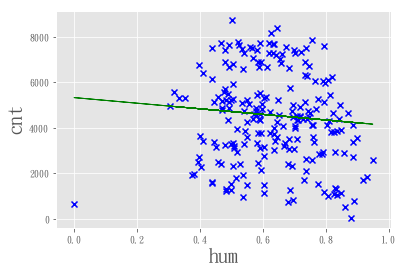

In [12]:
X = df_day[['hum']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('hum',FontProperties=font_title)
plt.show()

### 3.1.6風速(windspeed)和租賃自行車數量(cnt)

各變項參數: 
 [[-5127.60536383]]
均方誤差 (Mean squared error, MSE): 3613113.14


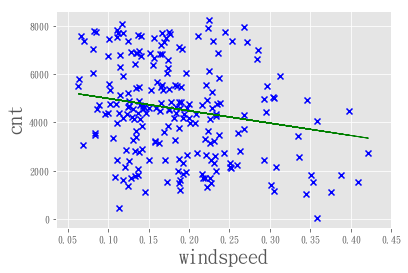

In [13]:
X = df_day[['windspeed']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

# linear regression 物件
regr = linear_model.LinearRegression()
# 訓練模型
regr.fit(X_train, y_train)

print('各變項參數: \n', regr.coef_)
print("均方誤差 (Mean squared error, MSE): %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

plt.style.use('ggplot')
plt.scatter(X_test, y_test,  color='blue', marker = 'x')
plt.plot(X_test, regr.predict(X_test), color='green', linewidth=1)
plt.ylabel('cnt',FontProperties=font_title)
plt.xlabel('windspeed',FontProperties=font_title)
plt.show()

## plot_learning_curve function

In [14]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples",FontProperties=font_title)
    plt.ylabel("Score",FontProperties=font_title)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


## 3.2 多變項線性回歸

In [15]:
from sklearn.model_selection import train_test_split

# 切割訓練和測試資料
X = df_day[['season','weathersit','temp','atemp','hum','windspeed']]
y = df_day[['cnt']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training

### 標準化(Normorlize)
降低模型複雜度，防止overfitting                                                                                               
降低權重過高情況

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

### 創造高維變項

In [17]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)        #0~2次方
X_train_poly = quadratic.fit_transform(X_train_std)     #產生x^0, x^1, x^2
X_test_poly = quadratic.fit_transform(X_test_std)       #產生x^0, x^1, x^2
X_poly = quadratic.fit_transform(X_std)

## 多變項線性回歸(6 features)

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')

lr = LinearRegression()
lr.fit(X_train_std, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_std) - y_test) ** 2))
print("R Square:",lr.score(X_test_std, y_test))

各變項參數: [[ 430.07807045 -244.05416662  697.81416273  302.43985254 -341.08746531
  -251.38365264]]
MSE: 1700338.64
R Square: 0.55236096612


<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

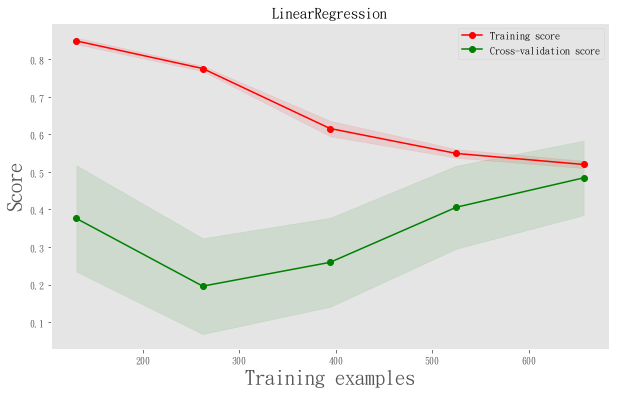

In [19]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearRegression()

plot_learning_curve(estimator, "LinearRegression", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 3.3 多項式(Polynomial)非線性回歸

In [20]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_poly) - y_test) ** 2))
print("R Square:",lr.score(X_test_poly, y_test))

各變項參數: [[ -4.60280170e+16   1.36680489e+02  -1.36358750e+02   2.88453714e+03
   -2.08327034e+03  -3.46163142e+02  -5.57524465e+02  -1.21727194e+02
    1.77917348e+02   4.46863164e+02  -3.95388521e+02  -2.63471715e+02
   -2.11422663e+02  -5.54091921e+01   1.74924024e+03  -1.64646462e+03
   -1.34159580e+02   1.35769784e+02  -2.44670953e+03   5.01424891e+02
   -1.29493093e+01  -2.33648442e+03   1.18841439e+03  -5.48888053e+01
    2.43236573e+03  -2.79031854e+02  -5.86329018e+01   1.04966601e+02]]
MSE: 1604464.15
R Square: 0.577601329831


<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

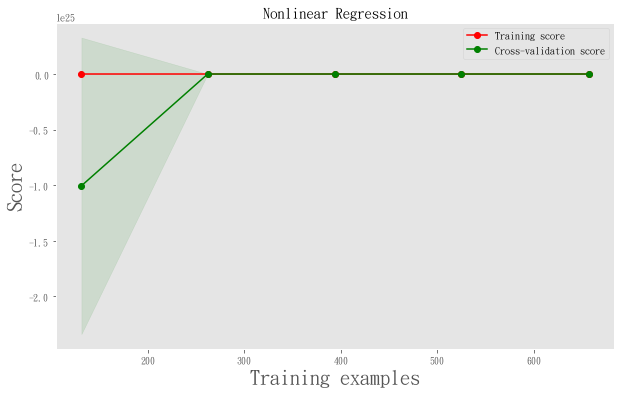

In [21]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearRegression()

plot_learning_curve(estimator, "Nonlinear Regression", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# ---------------------------------------------------------------------------

In [22]:
X = df_day[['season','weathersit','temp','atemp','hum','windspeed']]
y = df_day[['cnt']]

## 將回歸寫成function

In [23]:
# 多變項迴歸
def Muti_variable_regression(X, y,tag='std', flag='multi'):

    import numpy as np
    from sklearn.model_selection import train_test_split

    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import PolynomialFeatures

    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso

    from sklearn.model_selection import KFold
    

    # 切割訓練和測試資料
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
    
     # 標準化
    sc = StandardScaler()
    sc.fit(X_train)
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)
    X = sc.transform(X)
        
    # 創造高維變項
    if tag == 'poly':
        quadratic = PolynomialFeatures(degree=2)        #0~2次方
        X_train = quadratic.fit_transform(X_train)     #產生x^0, x^1, x^2
        X_test = quadratic.fit_transform(X_test)       #產生x^0, x^1, x^2
        X = quadratic.fit_transform(X) 
    
    
    # 多變項迴歸 
    if flag == 'multi':
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        print('各變項參數:', lr.coef_)
        print("MSE: %.2f" % np.mean((lr.predict(X_test) - y_test) ** 2))
        print("R Square:",lr.score(X_test, y_test))
        
        cv = KFold(n_splits=10, random_state=None, shuffle=True)
        estimator = LinearRegression()
        if tag == 'std':
            plot_learning_curve(estimator, "LinearRegression", X, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
        elif tag =='poly':
            plot_learning_curve(estimator, "NonlinearRegression", X, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

    # 脊迴歸(Ridge Regression):L2 正規化
    elif flag == 'ridge':
        ridge = Ridge(alpha=1)
        ridge.fit(X_train, y_train)

        print('各變項參數:', ridge.coef_)
        print("MSE: %.2f" % np.mean((ridge.predict(X_test) - y_test) ** 2))
        print("R Square:",ridge.score(X_test, y_test))
        
        cv = KFold(n_splits=10, random_state=None, shuffle=True)
        estimator = Ridge(alpha=1)
        plot_learning_curve(estimator, "Ridge Regression", X, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))
    
    #  LASSO：L1正規化 
    elif flag == 'lasso':
        lasso = Lasso(alpha=1)
        lasso.fit(X_train, y_train)

        print('各變項參數:', lasso.coef_)
        print("MSE: %.2f" % np.mean((lasso.predict(X_test) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
        print("R Square:",lasso.score(X_test, y_test))
        
        cv = KFold(n_splits=10, random_state=None, shuffle=True)
        estimator = Lasso(alpha=1)
        plot_learning_curve(estimator, "Lasso", X, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## Plotting Cross-Validated Prediction

In [24]:
# sklearn.model_selection.cross_val_predict 使用交叉驗證函式
def plot_cross_validated(X, y, flag='multi'):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import cross_val_predict
    
    
    lr = LinearRegression()
    if flag == 'multi':
        regr = LinearRegression()
    elif flag == 'ridge':
        regr = Ridge(alpha=1)
    elif flag == 'lasso':
        regr = Lasso(alpha=1)
    precise=cross_val_predict(regr, X,y, cv=10)
    fig, ax = plt.subplots()
    ax.scatter(y, precise, edgecolors=(0, 0, 0))
    ax.plot([y.min(), y.max()], [y.min(),y.max()], 'red')
    ax.set_xlabel('Predict result',FontProperties=font_title)
    ax.set_ylabel('Real situation',FontProperties=font_title)
    plt.title('Bike rented',FontProperties=font_title)
    plt.show()
    fig.canvas.draw() 

#### 多變項

各變項參數: [[ 471.15374021 -219.0045124   617.92514224  415.3014441  -325.32196652
  -210.77562709]]
MSE: 2057883.12
R Square: 0.494621661108


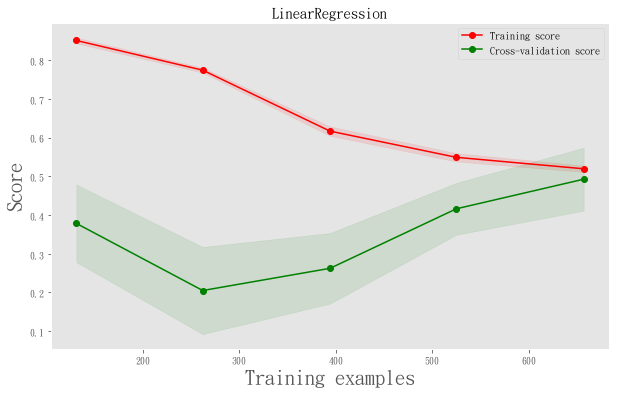

In [25]:
Muti_variable_regression(X, y,tag='std', flag='multi')

#### 交叉驗證

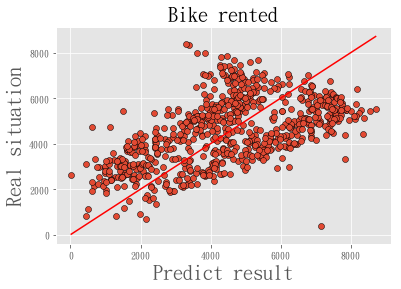

In [26]:
 plot_cross_validated(X, y, flag='multi')

#### 高次方

各變項參數: [[  2.28181574e-11   3.75330430e+02  -3.89990627e+01   3.71802908e+03
   -2.64311510e+03  -5.29843412e+02  -4.67820433e+02  -8.14605529e+01
    4.07319050e+01  -1.58896104e+03   1.70299926e+03  -2.75755780e+02
   -1.27727772e+01  -7.10512006e+01   7.89684689e+02  -8.51559438e+02
   -1.49276119e+01  -1.37740230e+02  -9.90516145e+03   1.68596816e+04
   -1.16760549e+03  -7.15888704e+02  -7.69613803e+03   1.26636739e+03
    8.39193323e+02  -1.45126305e+02  -4.51645657e+01   8.65726726e+00]]
MSE: 16931125.45
R Square: -3.64852078042


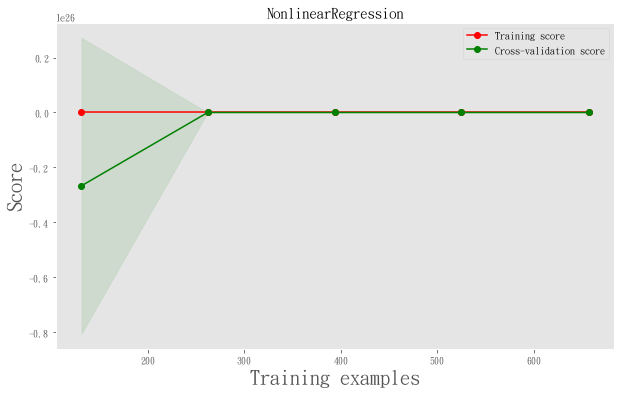

In [27]:
Muti_variable_regression(X, y,tag='poly', flag='multi')

## 3.4 脊回歸(Ridge Regression): L2 正規化

#### 交叉驗證

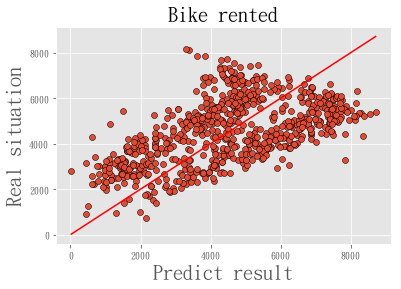

In [28]:
 plot_cross_validated(X, y, flag='ridge')

#### 多變項

各變項參數: [[ 453.82413347 -206.64336706  835.96589948  194.51212298 -380.06023692
  -272.80330898]]
MSE: 1848334.94
R Square: 0.484464517507


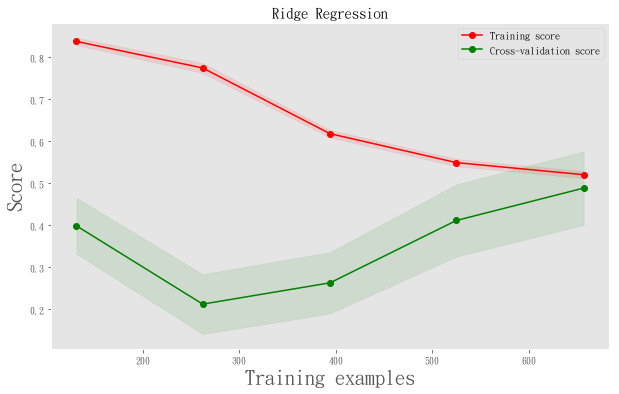

In [29]:
Muti_variable_regression(X, y,tag='std', flag='ridge')

#### 高次方

各變項參數: [[    0.           394.89323723   -72.46751026  1122.24045694
   -280.77126688  -550.83727496  -347.00175653  -149.68070297   -43.4243465
   -623.5134332    689.68493852   -31.50439947     6.07434524
    -27.34084422   493.37462242  -480.31485118   -25.32361678
   -136.38258267  -801.53616346  -544.04693004  -186.85051426  -167.6189167
    598.91661198   150.8083158     93.82585643  -165.77516862
    -26.52119503   -62.07131456]]
MSE: 1457930.90
R Square: 0.62892437768


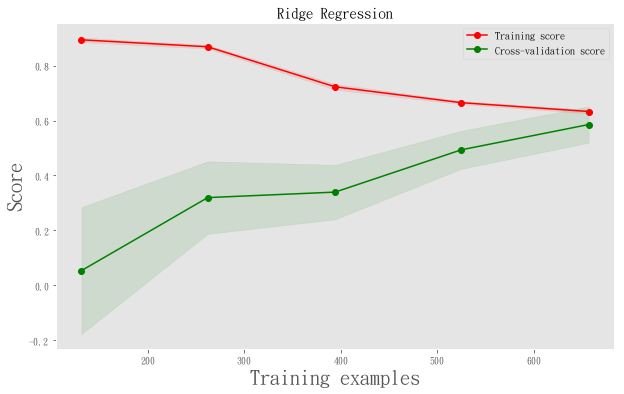

In [30]:
Muti_variable_regression(X, y,tag='poly', flag='ridge')

## 3.5 LASSO：L1正規化

#### 多變項

各變項參數: [ 381.13584197 -262.08894502  651.97011898  467.31887183 -334.05930881
 -227.09923781]
MSE: 1689719.00
R Square: 0.503903652282


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

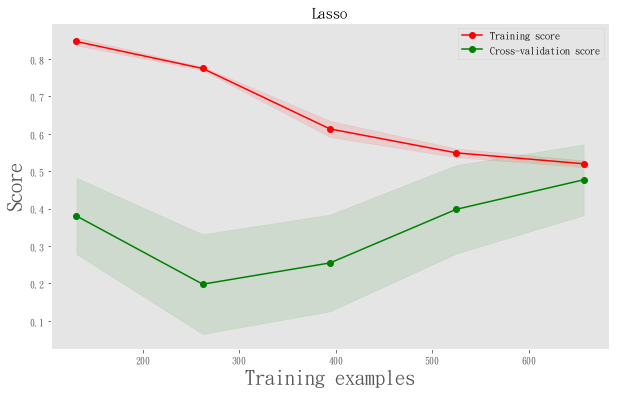

In [31]:
Muti_variable_regression(X, y,tag='std', flag='lasso')

#### 高次方

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

各變項參數: [    0.           360.96732006    10.09766823   950.30052123    -0.
  -494.69643304  -316.56139177  -185.15755922   -19.04550009 -1664.64550852
  1653.80700128   -69.86805499    55.86125181  -133.08267448   510.41584755
  -569.54062603     0.          -102.50487925  -573.28754142    -0.
    19.10222085   -75.25463264   -38.72401795    -0.             0.
  -176.95262106   -48.31438821   -16.1478166 ]
MSE: 1508404.40
R Square: 0.585859808962


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

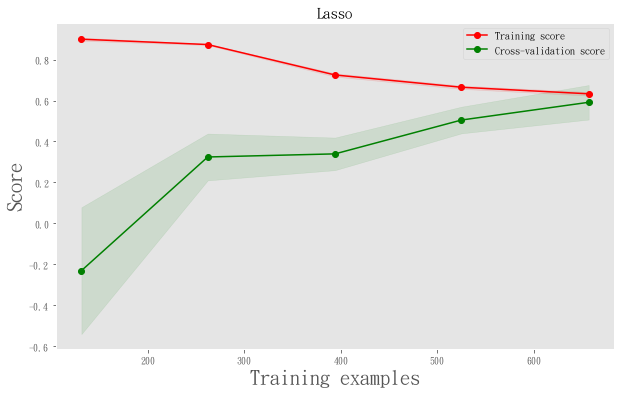

In [32]:
Muti_variable_regression(X, y,tag='poly', flag='lasso')

# ---------------------------------------------------------------------------------

# 加入registered高相關的特徵

In [33]:
X = df_day[['season','weathersit','temp','atemp','hum','windspeed','registered']]
y = df_day[['cnt']]

#### 多變項線性回歸

各變項參數: [[   17.52567586  -117.45619768   178.24855674   155.95045842
    -28.72593029   -39.55221487  1596.69408767]]
MSE: 317778.24
R Square: 0.916744563031


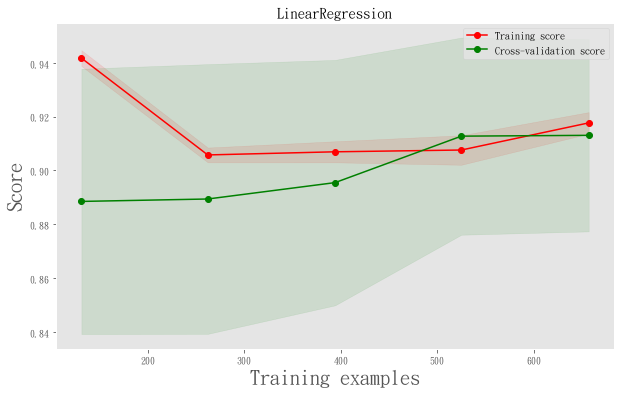

In [34]:
Muti_variable_regression(X, y,tag='std', flag='multi')

#### 交叉驗證

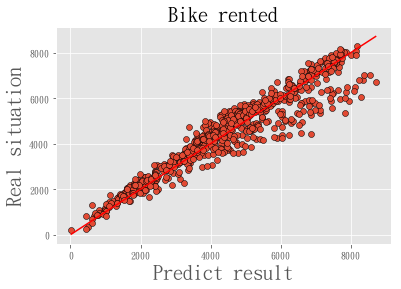

In [35]:
plot_cross_validated(X, y, flag='multi')

# --------------------------------------------------------------------------

# 相關性大於0.6的做訓練

In [36]:
X = df_day[['temp','atemp','casual','registered']]
y = df_day[['cnt']]

#### 多變項線性回歸

各變項參數: [[  5.06696304e-13   0.00000000e+00   6.52964241e+02   1.55478243e+03]]
MSE: 0.00
R Square: 1.0


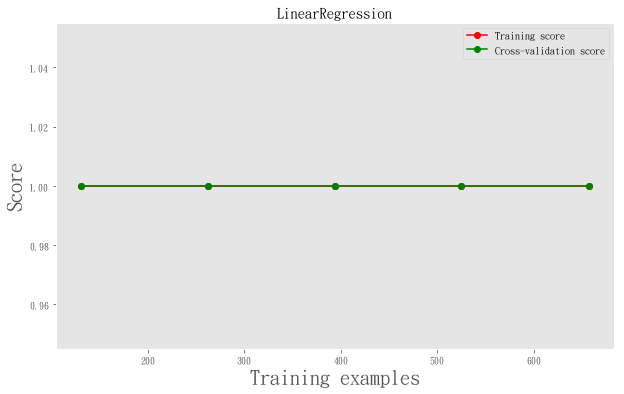

In [37]:
Muti_variable_regression(X, y,tag='std', flag='multi')

#### 交叉驗證

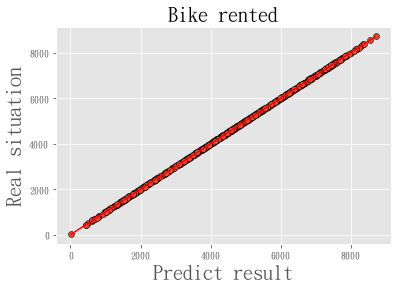

In [38]:
plot_cross_validated(X, y, flag='multi')

#### 多項式非線性回歸

各變項參數: [[  0.00000000e+00  -1.70530257e-12   9.37916411e-13   6.71232358e+02
    1.59817072e+03   3.07665005e-12  -2.84217094e-12  -1.02318154e-12
   -2.64499533e-12   5.68434189e-14   8.95283847e-13   3.04112291e-12
   -1.56319402e-13   5.68434189e-13  -1.70530257e-13]]
MSE: 0.00
R Square: 1.0


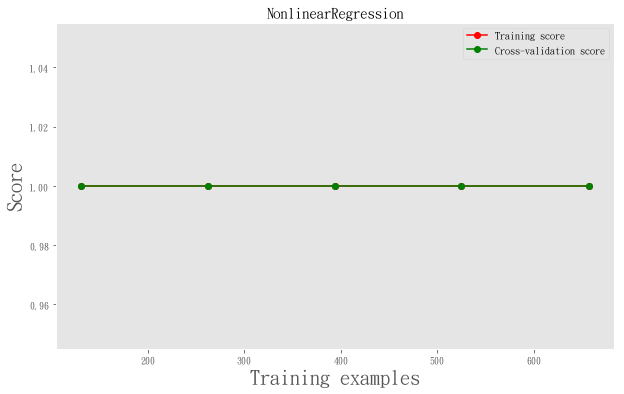

In [39]:
Muti_variable_regression(X, y,tag='poly', flag='multi')

#### 多項式脊回歸

各變項參數: [[  0.00000000e+00   6.81264089e-01   3.78612394e+00   6.84653460e+02
    1.57163663e+03   5.21868957e+00  -9.17985401e+00  -3.31220090e+00
   -2.45462904e+00   2.34860873e+00   3.19623702e+00   3.46128946e+00
    2.06704058e+00  -2.54171777e+00   1.12739013e+00]]
MSE: 19.67
R Square: 0.999994599579


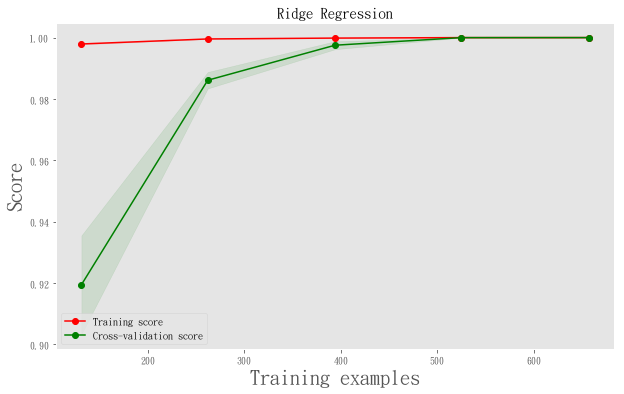

In [40]:
Muti_variable_regression(X, y,tag='poly', flag='ridge')

#### 多項式Lasso回歸

各變項參數: [    0.             0.             0.           688.77638459  1579.70256156
    -0.            -0.            -0.            -0.            -0.            -0.
    -0.             0.            -0.            -0.        ]
MSE: 1.32
R Square: 0.999999629811


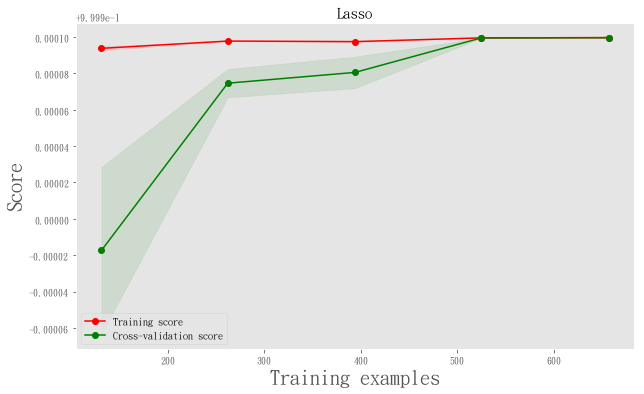

In [41]:
Muti_variable_regression(X, y,tag='poly', flag='lasso')

# -----------------------------------------------------------------------------

## 全部特徵去學習

In [42]:
X = df_day[['season','yr','mnth','holiday','weekday','workingday',
             'weathersit','temp','atemp','hum','windspeed','casual','registered']]
y = df_day[['cnt']]

#### 多變相線性回歸

各變項參數: [[ -1.02399850e-12   4.54747351e-13   7.95807864e-13   1.25055521e-12
    2.27373675e-13  -1.36424205e-12  -6.53699317e-13   5.68434189e-13
   -2.55795385e-13   3.41060513e-13   0.00000000e+00   6.70902041e+02
    1.57033044e+03]]
MSE: 0.00
R Square: 1.0


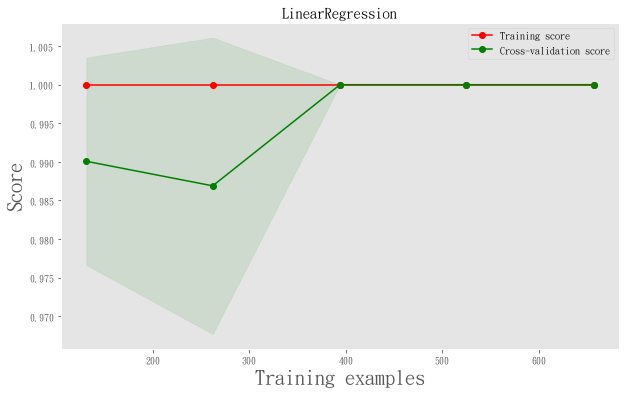

In [43]:
Muti_variable_regression(X, y,tag='std', flag='multi')

#### 交叉驗證

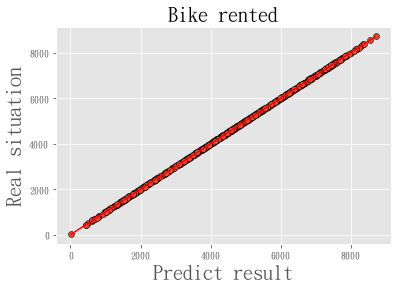

In [44]:
plot_cross_validated(X, y, flag='multi')

#### 多項式非線性回歸

各變項參數: [[  1.14438649e-02  -1.64845915e-12  -6.39358208e-01   1.08002496e-12
    2.83463902e+01  -3.19744231e-13   5.31386618e+01   9.87654403e-13
    3.24718030e-12  -2.80664381e-12   1.42819090e-12   5.89750471e-13
    6.84064943e+02   1.54053123e+03   1.03028697e-13   2.47268872e-12
    3.26849658e-13   1.10134124e-12  -7.49622586e-13   1.96642702e-12
   -1.20792265e-12   4.76063633e-12  -5.22248911e-12  -6.60804744e-13
   -9.02389274e-13   4.22772928e-13  -5.97744076e-13   3.26696404e+01
   -8.33111358e-13  -6.89226454e-13  -1.21502808e-12  -1.17950094e-12
    1.23634436e-12  -9.27258270e-13   2.38031816e-13   1.98951966e-13
    1.06581410e-13   7.01660952e-13  -2.62900812e-13  -7.03437308e-13
   -1.18660637e-12  -6.71462885e-13  -7.63833441e-13   1.50190971e-12
   -4.19220214e-12   4.36273240e-12  -1.08002496e-12   9.41469125e-13
    5.89750471e-13  -7.60280727e-13   1.17063144e+01   8.38440428e-13
    6.11018100e+01  -1.31450406e-13  -4.76063633e-13  -1.42819090e-12
    4.3343106

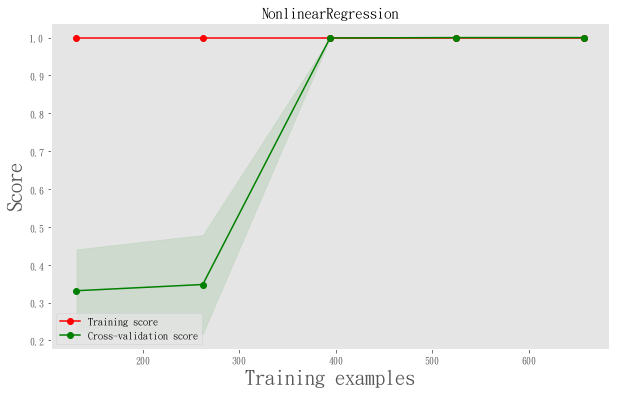

In [45]:
Muti_variable_regression(X, y,tag='poly', flag='multi')

#### 多項式脊回歸

各變項參數: [[  0.00000000e+00   5.99764109e+00   2.53978282e+01   8.76164949e+00
    5.01700549e-02   3.53196146e+00   6.51802290e+00  -4.00247930e+00
    2.22077799e+01  -3.05317313e+00  -6.31814389e+00  -4.93678471e+00
    6.87113011e+02   1.47960800e+03  -5.90561465e+00  -4.92582905e+00
    3.82834138e+00  -3.82019602e+00  -1.48413795e+00  -8.10027875e+00
   -5.77265260e-01  -1.05610057e+01   2.13169356e+00   7.22151245e-01
    2.20139380e+00  -4.11262317e+00   1.04258163e+01   1.88999081e+00
   -1.96954522e+00  -2.08641006e+00  -1.27437413e+00  -3.33290888e+00
   -1.19413628e+00  -9.57511361e+00   1.00493550e+00  -2.05846982e+00
    2.60661890e+00  -2.23048382e+00   1.88615026e+01  -6.86456944e+00
    1.55496628e+00   5.06002364e-01   4.47288623e+00  -6.42323025e-02
   -1.06494824e+01   1.59991921e+01  -2.02271464e+00   4.07384927e-01
    7.05379751e-01  -2.47082901e-01   2.79771315e-01   3.61975980e-01
   -1.20746949e+00   1.80677699e+00   2.38618624e+00  -2.41040595e+00
   -1.5324074

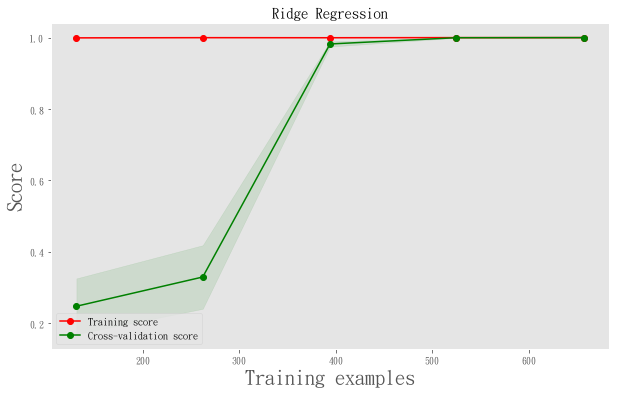

In [46]:
Muti_variable_regression(X, y,tag='poly', flag='ridge')

# ----------------------------------------------------------------------------------

## casual和registered去學習

In [47]:
X = df_day[['casual','registered']]
y = df_day[['cnt']]

#### 多項式非線性回歸

各變項參數: [[  0.00000000e+00   7.00274082e+02   1.56676739e+03  -8.20676860e-13
   -3.17967874e-13   3.05533376e-13]]
MSE: 0.00
R Square: 1.0


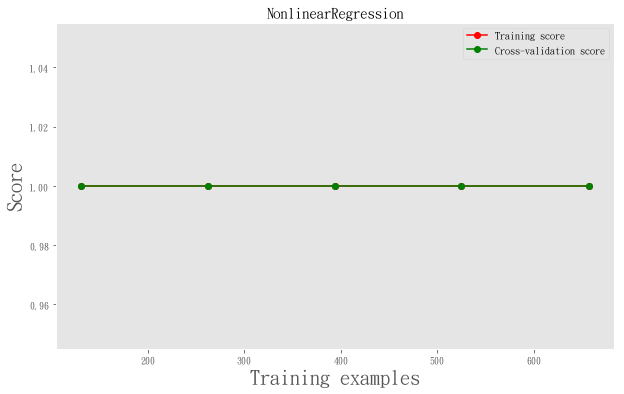

In [48]:
Muti_variable_regression(X, y,tag='poly', flag='multi')

#### 多變項Lasso回歸

各變項參數: [  704.1172513   1513.89612706]
MSE: 1.52
R Square: 0.999999628295


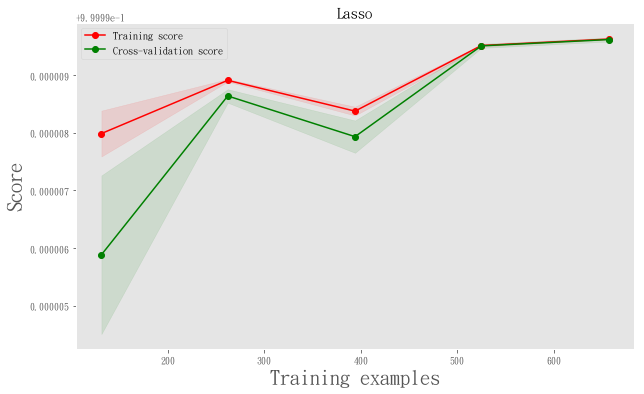

In [49]:
Muti_variable_regression(X, y,tag='std', flag='lasso')